## ALBERT 소개

* 언어 모델의 성능은 모델의 크기가 커질수록 향상된다고 알려져 있음. 그러나 메모리 제한과 긴 학습 시간 때문에 대규모 모델의 학습이 점점 더 어려워지고 있음
* 이러한 문제를 해결하기 위해 구글은 ALBERT라는 모델을 제안함. ALBERT는 BERT 아키텍처를 기반으로 하되, 메모리 사용량을 줄이고 학습 속도를 높이기 위해 여러 새로운 기법을 도입한 모델임
* 새로운 설계 덕분에 BERT보다 규모가변성(scalability; 확장성)이 크게 개선됨. ALBERT는 원조 BERT 대형 모델보다 매개변수가 18배 적고 학습 속도는 1.7배 빠름
* BERT와 비교했을 때 ALBERT 모델의 주된 수정 사항은 다음 세 가지 임:
    * 인수분해된 임베딩 매개변수화
    * 층 간 매개변수 공유
    * 문장 간 일관성 손실

* 처음 두 수정 사항은 매개변수 개수를 줄이기 위함. 세번째는 문장 순서 예측(sentence-order prediction, SOP)을 새로운 목적함수로 도입한 것. BERT의 NSP 작업을 대신하는 SOP 덕분에 모델이 더 얇아지고 성능이 개선됨
* 임베딩 매개변수화화
    * 분해된 임베딩 매개변수화(factorized embedding parameterization)는 커다란 어휘 임베딩 행렬을 두 개의 작은 행렬로 분해함. 이 행렬들은 은닉층의 크기를 어휘 크기와 분리함. 이러한 분해로 임베딩 매개변수 개수가 O(V x H)에서 O(V x E + E x H)로 줄어듦. 여기서 V는 어휘 크기, H는 은닉층 크기, E는 임베딩 개수. H >> E라는 조건이 충족되는 한 전체 모델 매개변수를 좀 더 효율적으로 사용할 수 있음
    * 예를 들어 ALBERT 대형 모델에서 H는 1026이고 V는 30,000. E가 128이라고 가정하면 H >> E 조건이 충족됨. V x H는 약 3천만이지만, (30,000 x 128 + 128 x 1026)은 약 4백만에 불과함
* 층 간 매개변수 공유
    * 층 간 매개변수 공유(cross-layer parameter sharing)는 네트워크가 깊어질수록 전체 매개변수 개수가 증가하는 문제를 방지함. 매개변수들을 공유 또는 복사함으로써 매개변수 크기를 작게 유지할 수 있기 때문에 매개변수 효율성을 높이는 또 다른 기법으로 유용함. 원 논문에서는 층들 사이에서 순방향(feed-forward) 매개변수들만 공유하거나, 주의 매개변수들만 공유하거나, 전체 매개변수를 공유하는 등의 다양한 접근 방식을 실험했음
* 문장 간 일관성 손실
    * 문장 간 일관성 손실(inter-sentence coherence loss)을 도입함. BERT 아키텍처는 MLM 손실과 NSP라는 두 가지 손실을 계산함. NSP는 주어진 두 세그먼트가 원본 텍스트에서 연이어 나타나는지 여부를 예측하는 이진 교차 엔트로피 손실(binary cross-entropy loss)을 사용함. 부정적 예시(negative example)은 서로 다른 문서에서 두 세그먼트를 선택해서 만듦. 그런데 ALBERT는 NSP가 비교적 쉬운 문제로 간주되는 주제 탐지(topic detection) 문제일 뿐이라고 비판하고, 주제 예측보다는 주로 일관성(또는 응집성)에 기반한 손실 계산 방식을 제안함
    *ALBERT의 SOP 손실함수는 주제 분류보다는 문장들 사이의 일관성 모델링에 중점을 둚. BERT처럼 ALBERT도 같은 문서에서 연속된 두 세그먼트를 긍정적 예시로 사용함. 부정적 예시는 긍정적 예시의 두 세그먼트의 순서를 바꾼 것. 이런 접근 방식 덕분에 모델은 담화(discourse) 수준에서 일관성 속성들의 좀 더 미묘한 차이를 학습할 수 있음


In [1]:
from transformers import BertConfig, BertModel

bert_base= BertConfig()
model = BertModel(bert_base)
print(f"{model.num_parameters() /(10**6)} million parameters")

109.48224 million parameters


In [2]:
# Albert-base Configuration
from transformers import AlbertConfig, AlbertModel

albert_base = AlbertConfig(
    hidden_size=768,
    num_attention_heads=12,
    intermediate_size=3072,
)
model = AlbertModel(albert_base)
print(f"{model.num_parameters() /(10**6)} million parameters")

11.683584 million parameters


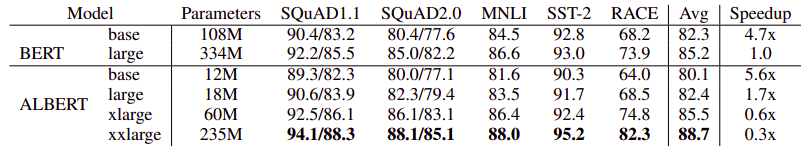

In [3]:
from IPython.display import Image 
albert = Image(filename='albert.png')

display(albert)

In [ ]:
from transformers import BertConfig, BertModel

bert_large= BertConfig(
     hidden_size=1024, 
     num_hidden_layers=24 ,
     num_attention_heads=16,
     intermediate_size=4096
)
model = BertModel(bert_large)
print(f"{model.num_parameters() /(10**6)} million parameters")


335.141888 million parameters


In [ ]:
from transformers import AlbertConfig, AlbertModel

albert_xxlarge= AlbertConfig()
model = AlbertModel(albert_xxlarge)
print(f"{model.num_parameters() /(10**6)} million parameters")

222.595584 million parameters


In [ ]:
import pandas as pd
from transformers import BertTokenizerFast, AlbertForMaskedLM
from transformers import pipeline

tokenizer = BertTokenizerFast.from_pretrained("kykim/albert-kor-base")
print(tokenizer.mask_token)
model = AlbertForMaskedLM.from_pretrained("kykim/albert-kor-base")
text = "고양이가 너무 슬퍼 보여요."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

fillmask = pipeline("fill-mask", tokenizer=tokenizer, model=model)
pd.DataFrame(fillmask("고양이가 너무 [MASK] 보여요."))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Some weights of the model checkpoint at kykim/albert-kor-base were not used when initializing AlbertForMaskedLM: ['albert.pooler.bias', 'albert.pooler.weight', 'sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassif

,score,token,token_str,sequence
0,0.318957,14047,좋아,고양이가 너무 좋아 보여요.
1,0.245623,24474,귀여워,고양이가 너무 귀여워 보여요.
2,0.089137,24613,맛있어,고양이가 너무 맛있어 보여요.
3,0.086741,38380,행복해,고양이가 너무 행복해 보여요.
4,0.038841,15509,예뻐,고양이가 너무 예뻐 보여요.


You can use output object or use the model directly with a pipeline for masked language modeling:

## RoBERTa 모델

* RoBERTa도 인기 있는 BERT 재구현 모델임. 이 모델은 구조적 설계보다는 학습 전략에서 많은 개선을 이룸. 특히 GLUE의 여러 과제에서 BERT를 능가하는 성능을 보임. 동적 마스킹(dynamic masking)은 RoBERTa의 독창적인 설계 선택 중 하나. 정적 마스킹(static masking)이 더 나은 성능을 보이는 작업도 있긴 하지만, RoBERTa는 동적 마스킹이 전반적인 성능에서 우수함을 입증함

* 구조상의 변화는 다음과 같음:
    * NSP를 훈련 목표로 사용하지 않음
    * 정적 마스킹을 사용하는 대신, 마스킹 패턴을 동적으로 변경함. 모델에 시퀀스를 입력할 때마다 마스킹 패턴이 생성됨
    * BPE 부분단어 토크나이저를 사용함

* 훈련과 관련한 변화는 다음과 같음:
    * 훈련 데이터 제어: BERT의 16GB보다 더 큰 데이터(이를테면 160GB)를 훈련에 사용함. 데이터의 양뿐 아니라 질과 다양성도 고려함
    * 훈련이 더 길다. 사전 학습 단계 수가 최대 50만임
    * 배치가 더 큼
    * 시퀀스가 더 길다. 덕분에 패딩이 줄어듬
    * 어휘가 큼. 30K BPE 어휘 대신 50K BPE의 대규모 어휘를 사용함

ROBERTA

In [ ]:
from transformers import AutoTokenizer, RobertaForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("klue/roberta-base")
print(tokenizer.mask_token)
model = RobertaForMaskedLM.from_pretrained("klue/roberta-base")
print(f"{model.num_parameters() /(10**6)} million parameters")
text = "고양이가 너무 슬퍼 보여요."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

fillmask = pipeline("fill-mask", tokenizer=tokenizer, model=model)
pd.DataFrame(fillmask("고양이가 너무 [MASK] 보여요."))

Device set to use cuda:0


110.651648 million parameters


,score,token,token_str,sequence
0,0.454525,16612,귀여워,고양이가 너무 귀여워 보여요.
1,0.247862,11259,예뻐,고양이가 너무 예뻐 보여요.
2,0.050850,13150,슬퍼,고양이가 너무 슬퍼 보여요.
3,0.050653,5723,좋아,고양이가 너무 좋아 보여요.
4,0.031386,21690,이뻐,고양이가 너무 이뻐 보여요.


In [14]:
from transformers import RobertaConfig, RobertaModel
conf= RobertaConfig()
model = RobertaModel(conf)
print(f"{model.num_parameters() /(10**6)} million parameters")

109.48224 million parameters


## ELECTRA

* ELECTRA 모델은 케빈 클라크의 2020년 논문에서 제안됨. ELECTRA는 대체 토큰 탐지(replaced token detection)를 학습 목표로 사용하는 새로운 마스크 언어 모델에 초점을 둔 것. 사전 학습 과정에서 모델을 무작위로 추출(sampling)한 토큰으로 훈련하는 대신, 유망한 토큰에서 추출한 합성 부정 예시와 실제 입력 토큰을 구별하도록 학습한다. ALBERT 모델은 BERT의 NSP 목표가 주제 탐지 문제이며 저품질의 부정 예시들을 사용한다고 비판했음. ELECTRA는 생성기(generator)와 판별기(discriminator)라는 두 개의 신경망을 훈력함
* 생성기는 고품질의 부정 예시를 생성하고, 판별기는 원래 토큰과 대체된 토큰을 구별함. 이는 GAN의 접근 방식으로 생성기는 가짜 이미지를 생성해서 판별기를 속이려 하고, 판별기는 속지 않으려 함. 이와 비슷하게 ELECTRA 생성기-판별기 접근 방식을 이용해 원래 토큰을 그럴듯하지만 합성된 고품질 부정 예시로 대체함함

In [39]:
from transformers import ElectraTokenizerFast, ElectraForMaskedLM, pipeline

tokenizer = ElectraTokenizerFast.from_pretrained("kykim/electra-kor-base")
model = ElectraForMaskedLM.from_pretrained("kykim/electra-kor-base")
print(f"{model.num_parameters() /(10**6)} million parameters")

fillmask = pipeline("fill-mask", tokenizer=tokenizer, model=model)
pd.DataFrame(fillmask(f"고양이가 너무 {fillmask.tokenizer.mask_token} 보여요."))

Some weights of ElectraForMaskedLM were not initialized from the model checkpoint at kykim/electra-kor-base and are newly initialized: ['generator_lm_head.bias', 'generator_predictions.LayerNorm.bias', 'generator_predictions.LayerNorm.weight', 'generator_predictions.dense.bias', 'generator_predictions.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


118.34088 million parameters


,score,token,token_str,sequence
0,0.056830,38797,ele,고양이가 너무 ele 보여요.
1,0.017942,7047,퀼,고양이가 너무 퀼 보여요.
2,0.009070,9714,##챤,고양이가 너무챤 보여요.
3,0.008013,35314,역설,고양이가 너무 역설 보여요.
4,0.007788,35987,중문,고양이가 너무 중문 보여요.
